## Homework 6

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/chc/desktop/Wholesale_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 30.9 KB


No missing data

## Normalizing data

In [5]:
x = df.drop(['Channel','Region'],axis=1)


In [6]:
y = df[['Channel','Region']]

In [7]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
x_df = pd.DataFrame(x_norm, columns = x.columns)
x_df.describe()

/Users/chc/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:498: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [8]:
df1 = pd.concat((y,x_df), axis= 1)
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Modelling using only data points (without first 2 label columns)

In [9]:
km = KMeans(3)
km.fit(x_df)

centers = km.cluster_centers_
centers

array([[ -1.20871181e-03,  -2.28008048e-01,  -2.54313190e-01,
         -4.57592143e-02,  -2.47954459e-01,  -9.32636926e-02],
       [ -3.40002010e-01,   1.75743749e+00,   2.22321340e+00,
         -2.65839100e-01,   2.27830470e+00,   1.33715965e-01],
       [  2.51544879e+00,   2.26355580e+00,   6.39713507e-01,
          4.88715568e+00,  -1.69484755e-01,   5.11938622e+00]])

## Silhouette Scores using K-means

In [10]:
scores = []
for k in range(2,16):
    km = KMeans(k)
    km.fit(x_df)
    labels = km.labels_
    score = silhouette_score(x_df,labels,metric='euclidean')
    scores.append(score)

/Users/chc/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


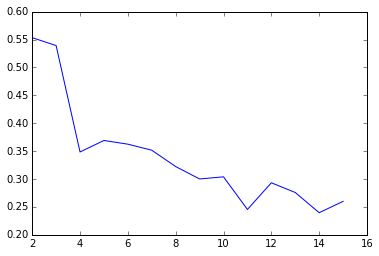

In [11]:
plt.plot(range(2,16),scores)

2-Clusters produces that best score. This is to be expected because we are trying to categorize our datapoints into 2 channels (indicated by the channels column). 

## Silhouette Scores using Agglomerative Clustering

In [12]:
scores2 = []
for k in range(2,16):
    km = AgglomerativeClustering(k)
    km.fit(x_df)
    labels = km.labels_
    score = silhouette_score(x_df,labels,metric='euclidean')
    scores2.append(score)

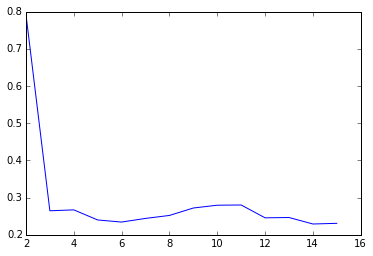

In [13]:
plt.plot(range(2,16),scores2)